# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [1]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt

In [2]:
!wget https://assets.gezdev.com/dip/CountCircles.jpg

--2022-10-21 02:11:46--  https://assets.gezdev.com/dip/CountCircles.jpg
Resolving assets.gezdev.com (assets.gezdev.com)... 203.158.180.101
Connecting to assets.gezdev.com (assets.gezdev.com)|203.158.180.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86825 (85K) [image/jpeg]
Saving to: ‘CountCircles.jpg’

CountCircles.jpg    100%[===================>]  84.79K   312KB/s    in 0.3s    

2022-10-21 02:11:48 (312 KB/s) - ‘CountCircles.jpg’ saved [86825/86825]



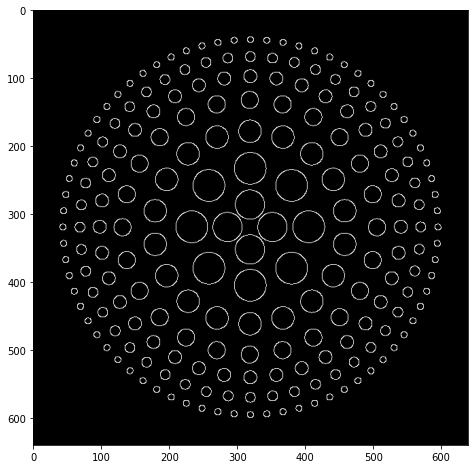

In [3]:
src = cv.imread("./CountCircles.jpg")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

## Contour Finding 

The picture has 210 circles.


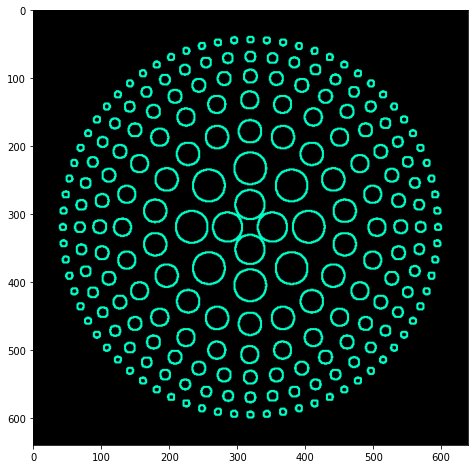

In [10]:
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
#print(contours)
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
cv.drawContours(drawn_contour_img, contours, -1, (0,255,200), 2) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
print(f"The picture has {len(contours)} circles.")
#print(len(contours))
plt.imshow(drawn_contour_img)
plt.show()

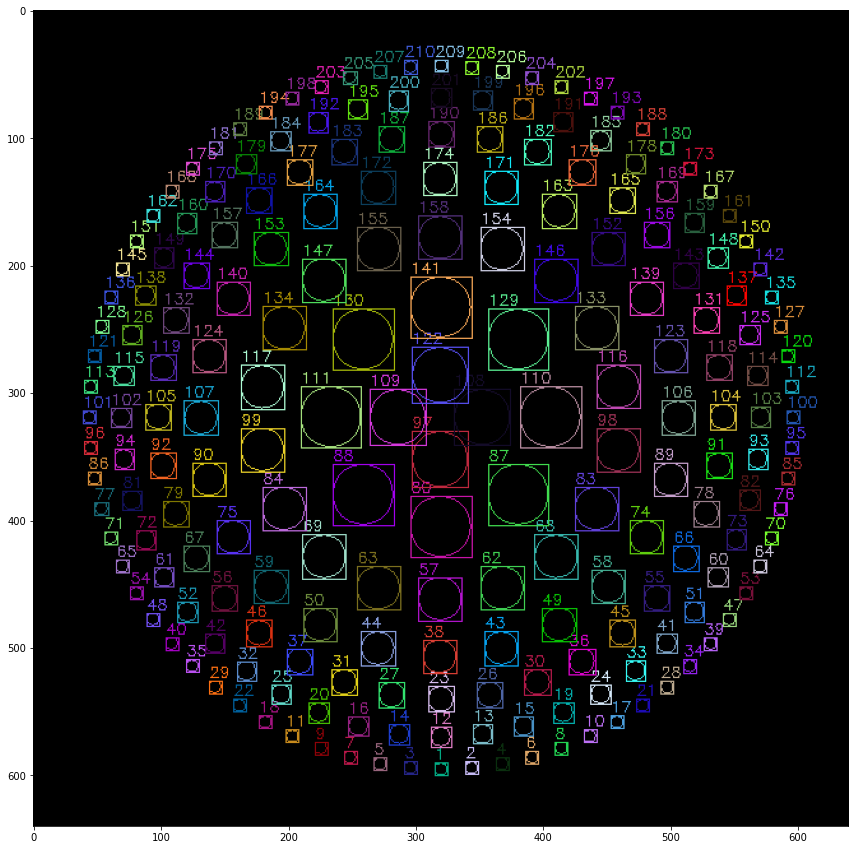

All Circle => 210


In [11]:
from numpy import random
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
for i,value in enumerate(contours):
    c = random.randint(255, size=(3))
    color = (c[0].item(),c[1].item(),c[2].item())
    cv.drawContours(drawn_contour_img, contours, i, color, 1)
    x,y,w,h = cv.boundingRect(contours[i])
    cv.putText(drawn_contour_img,str(i+1),(x,y-3),cv.FONT_HERSHEY_SIMPLEX,0.4,color,1)
    cv.rectangle(drawn_contour_img,(x,y),(x+w,y+h),color,1)
plt.rcParams["figure.figsize"] = [15, 15]
plt.imshow(drawn_contour_img)
plt.show()
print(f"All Circle => {i+1}")
